In [13]:
import tensorflow.compat.v2 as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import *

In [2]:
df = pd.read_csv(("/Users/acer/Desktop/big data mining/a2/magic04.data"), header = None)

In [3]:
df.columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDsit', 'target']

In [4]:
newdf = pd.Series(df['target'], dtype = "category")
df['target'] = newdf.cat.codes

In [5]:
X = df.drop(['target'],axis=1)
y = df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6969)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

1332/1332 [==============================] - 2s 1ms/step - loss: 0.3159 - accuracy: 0.8691
Train score: 0.3159049451351166
Train accuracy: 0.8690851926803589


In [9]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

571/571 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8628
Test score: 0.3236880600452423
Test accuracy: 0.8627760410308838


In [10]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

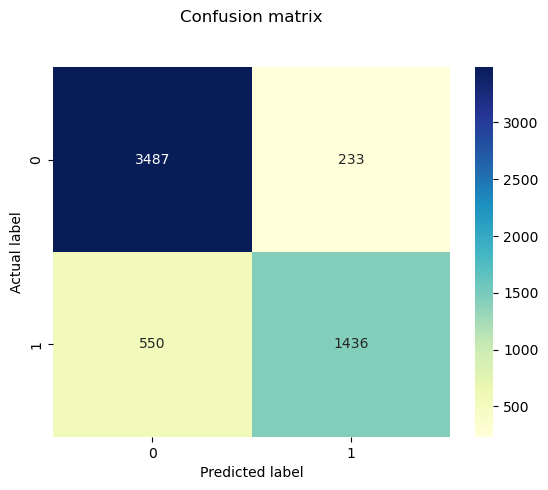

In [11]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3720
           1       0.86      0.72      0.79      1986

    accuracy                           0.86      5706
   macro avg       0.86      0.83      0.84      5706
weighted avg       0.86      0.86      0.86      5706



In [15]:
y_prob = classifier.predict(X_test)

179/179 [==============================] - 0s 1ms/step


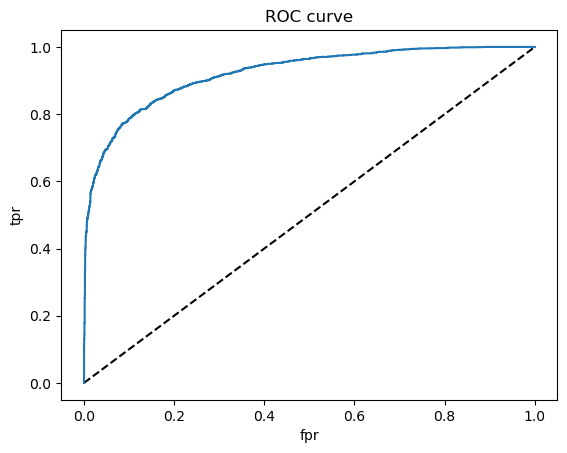

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [17]:
roc_auc_score(y_test,y_prob)

0.922268040260317

In [18]:
no_of_neurons = [6,7,8]
no_of_layers = [2,3,4]
l1 = [0.01,0.1]
l2 = [0.01,0.1]
grid = dict(no_of_neurons = no_of_neurons, no_of_layers = no_of_layers, l1 = l1, l2 = l2)

In [19]:
best_accuracy,best_score,best_layers,best_neuron,best_l1,best_l2 = 0,0,0,0,0,0
for l1_val in grid['l1']:
  for l2_val in grid['l2']:
    for neuron_count in grid['no_of_neurons']:
      for layer_count in grid['no_of_layers']:
        grid_model = Sequential()
        grid_model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
        for x in range(layer_count):
          grid_model.add(Dense(units = neuron_count, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer = l1_l2(l1=l1_val,l2=l2_val)))
        grid_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
        grid_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
        history1 = grid_model.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)
        score, acc = grid_model.evaluate(X_train, y_train, batch_size=10)
        if best_accuracy < acc:
          best_accuracy = acc
          best_score = score
          best_layers = layer_count
          best_neuron = neuron_count
          best_l1 = l1_val
          best_l2 = l2_val
print(f'The best parameters from grid search was layers: {best_layers}, neuron count of: {best_neuron}, with a l1 value of: {best_l1} and a l2 value of: {best_l2}')
print("="*20)
print(f'The given parameters had a accuracy of: {best_accuracy} and score of: {best_score}')

1332/1332 [==============================] - 5s 3ms/step - loss: 5.4508 - accuracy: 0.6468
The best parameters from grid search was layers: 3, neuron count of: 8, with a l1 value of: 0.01 and a l2 value of: 0.1
The given parameters had a accuracy of: 0.8643532991409302 and score of: 0.3883817493915558


In [20]:
classifier_tuned = Sequential()
classifier_tuned.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
for layer_x in range(2):
  classifier_tuned.add(Dense(units = 36, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer = l1_l2(l1=0.01,l2=0.01)))
classifier_tuned.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
classifier_tuned.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history1 = classifier_tuned.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)
score, acc = classifier_tuned.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

1332/1332 [==============================] - 10s 7ms/step - loss: 0.3543 - accuracy: 0.8667
Train score: 0.35428586602211
Train accuracy: 0.866681694984436


In [21]:
y1_pred1 = classifier_tuned.predict(X_test)
y1_pred1 = (y_pred > 0.5)
score, acc = classifier_tuned.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

571/571 [==============================] - 14s 24ms/step - loss: 0.3872 - accuracy: 0.8626
Test score: 0.3872179090976715
Test accuracy: 0.8626007437705994


In [22]:
cm = confusion_matrix(y_test, y1_pred1)

Text(0.5, 23.52222222222222, 'Predicted label')

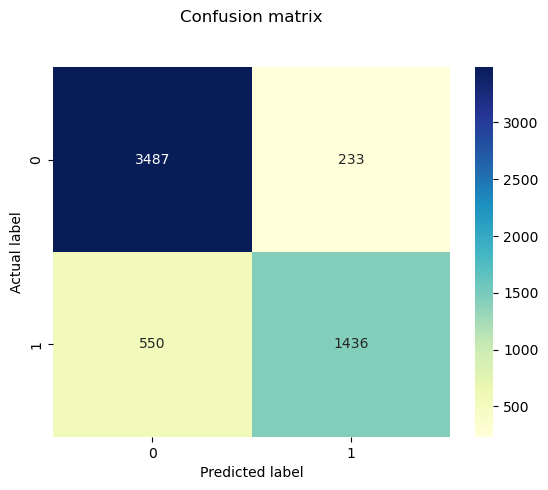

In [23]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print(classification_report(y_test,y1_pred1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3720
           1       0.86      0.72      0.79      1986

    accuracy                           0.86      5706
   macro avg       0.86      0.83      0.84      5706
weighted avg       0.86      0.86      0.86      5706



179/179 [==============================] - 1s 4ms/step


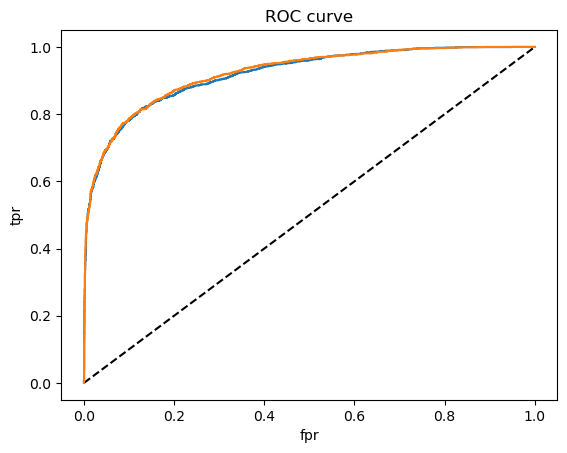

In [25]:
y_pred_proba1 = classifier_tuned.predict(X_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1, label='ANN1')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [26]:
roc_auc_score(y_test,y_pred_proba1)

0.9192561641165579

Text(0.5, 1.0, 'Learning rate vs. loss')

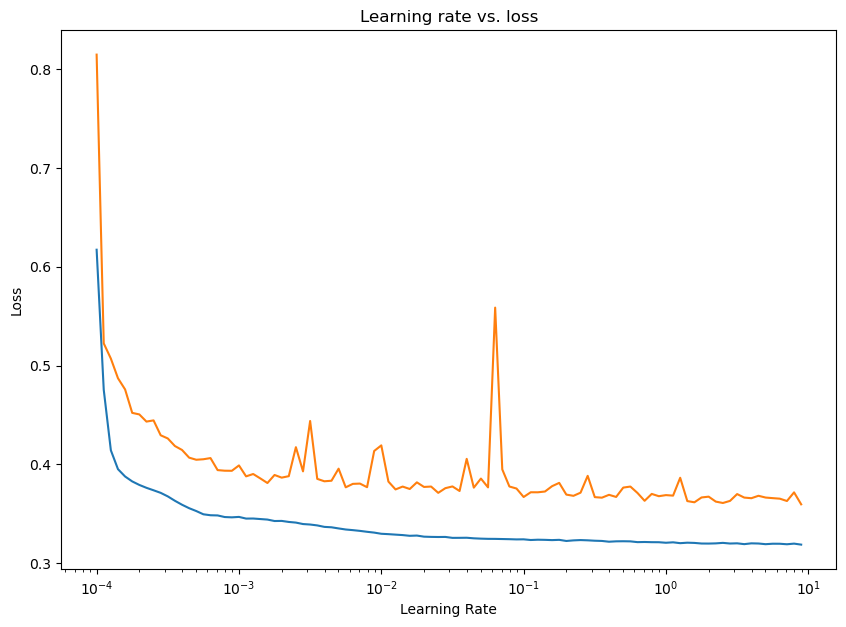

In [27]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.semilogx(lrs, history1.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")